In [3]:
import gzip
import struct
import numpy as np


def read_idx(filename):
    """
    Read an IDX formatted file (images or labels).
    Returns a numpy array.
    """
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack(">HBB", f.read(4))
        shape = tuple(struct.unpack(">I", f.read(4))[0] for d in range(dims))
        # then read the rest
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(shape)

base_path = './data/oracle'
# Example usage:
images_train = read_idx(f'{base_path}/train-images-idx3-ubyte.gz')
labels_train = read_idx(f'{base_path}/train-labels-idx1-ubyte.gz')
images_test  = read_idx(f'{base_path}/t10k-images-idx3-ubyte.gz')
labels_test  = read_idx(f'{base_path}/t10k-labels-idx1-ubyte.gz')

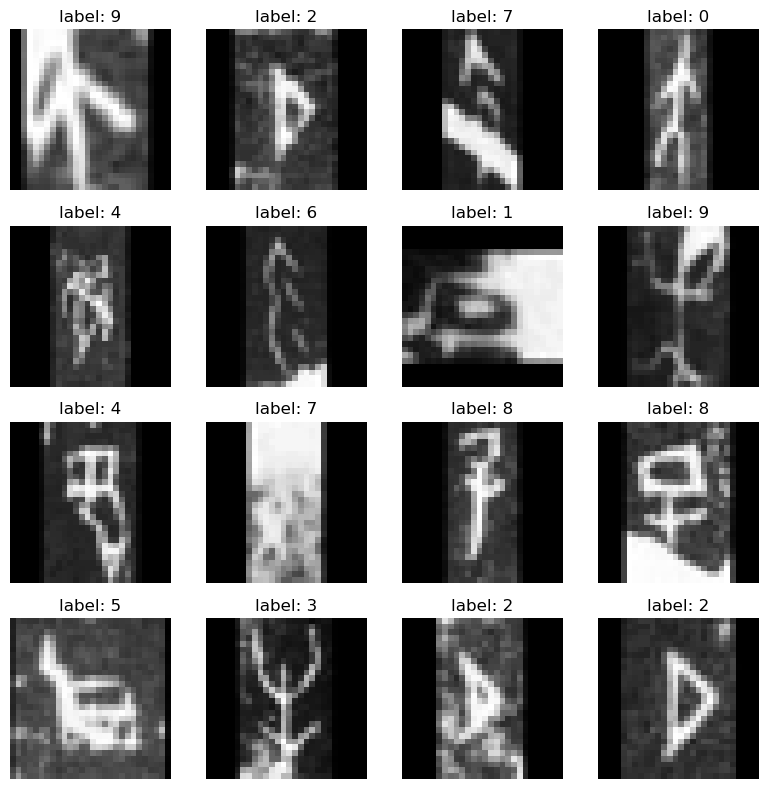

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose:
# images_train is a numpy array of shape (N_train, H, W) or (N_train, H, W, C)
# labels_train is a 1D array of length N_train

def show_images(images, labels, num_images=9, cmap='gray'):
    """
    Show a grid of num_images from images with their labels.
    """
    # Choose num_images random indices
    N = images.shape[0]
    indices = np.random.choice(N, size=num_images, replace=False)
    
    # Determine grid size
    cols = int(np.sqrt(num_images))
    rows = (num_images + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = axes.flatten()
    
    for ax, idx in zip(axes, indices):
        img = images[idx]
        lbl = labels[idx]
        # if there's a channel dimension, e.g. (H, W, 3) or (...,1), you may need to squeeze or select
        if img.ndim == 3 and img.shape[-1] == 1:
            img = img[...,0]
        ax.imshow(img, cmap=cmap)
        ax.set_title(f'label: {lbl}')
        ax.axis('off')
    
    # If more subplots than images, hide extras
    for ax in axes[len(indices):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


# Example usage:
show_images(images_train, labels_train, num_images=16)
